In [1]:
import numpy as np
from scipy.ndimage import median_filter
from skimage import io, color, util
from numba import njit, types, int64, prange
from numba.typed import List
import timeit
from optimizer_func import DenoisePRCG
from utils_funcs import *
from AMF import AdapMedianFilter

In [4]:
# Denoiser class interface
class ImpulseDenoiser:
    def __init__(self, AdapMedianFilter=AdapMedianFilter, alpha=100, beta=2, max_window=39, tol=1e-6, max_iter=100):
        self.alpha = alpha
        self.beta=beta
        self.max_window = max_window
        self.AdapMedianFilter=AdapMedianFilter,
        self.tol = tol
        self.max_iter = max_iter

    def denoise(self, img):
        noisy_mask, filtered_pix = AdapMedianFilter(img, self.max_window)
        return DenoisePRCG(
            img, 
            noisy_mask,
            filtered_pix,
            self.beta, 
            self.tol, 
            self.max_iter, 
            self.alpha
        )

In [ ]:
if __name__ == "__main__":
    # Load and corrupt image
    import imageio.v2 as imageio

    # url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
    # imageio.imwrite("lena.png", imageio.imread(url))

    path="/Users/mahmoudpd/Desktop/Experiments/PyExp/lena.png"
    # Load RGB image
    img = io.imread(path)

    # Add salt & pepper noise (70% noisy pixels, balanced 50/50)
    # noisyImg = add_salt_pepper_noise_rgb(img, amount=0.7, salt_vs_pepper=0.5)

    # Add salt and pepper noise
    noisyImg = util.random_noise(img, mode='s&p', amount=0.7)
    noisyImg = (noisyImg * 255).astype(np.uint8)

    denoiser = ImpulseDenoiser()
    denoised = denoiser.denoise(noisyImg)
    
    # Calculate metrics
    psnr = 10 * np.log10(255**2/np.mean((denoised-img)**2))
    print(f"PSNR: {psnr:.2f} dB")

PSNR: 34.68 dB


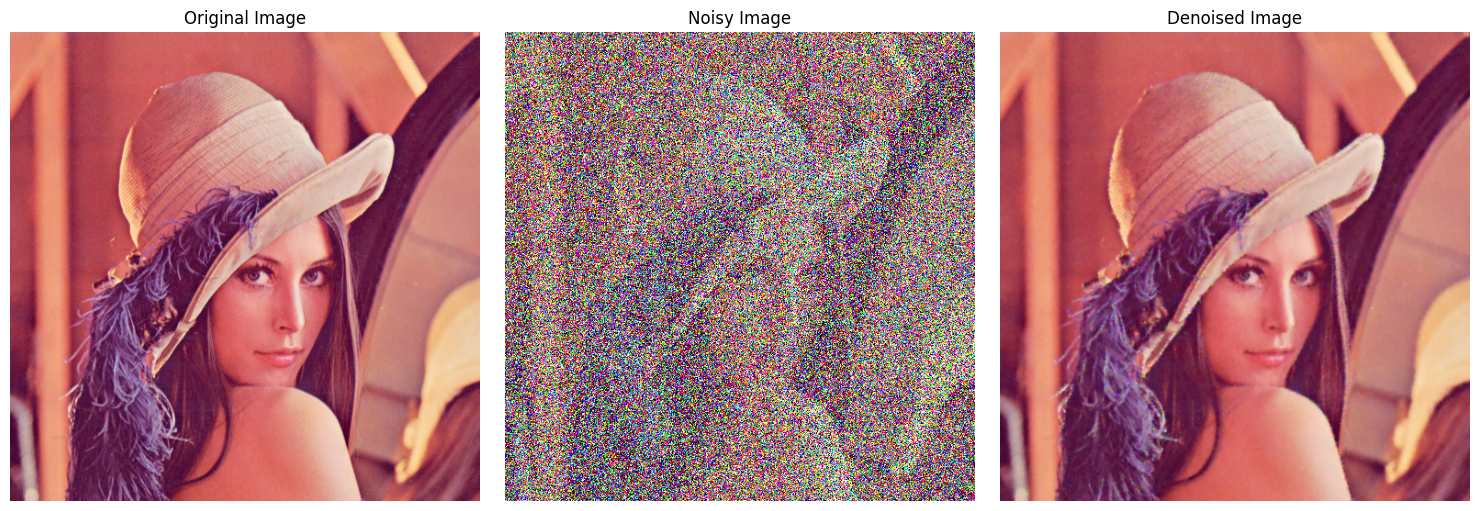

In [6]:
#here we display the results from the sample example:
plot_images(img, noisyImg, denoised, 
            titles=['Original Image', 'Noisy Image', 'Denoised Image'])